In [59]:
#Import libraries

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
import torchvision
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import math
import matplotlib.pyplot as plt

In [60]:
#Load Dataset

train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [61]:
#Data Splitting

train_loader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 64, shuffle = False)
val_loader = DataLoader(dataset = val_dataset, batch_size = 64, shuffle = False)

In [62]:
# Creating NN
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten if needed
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

In [63]:
model = NeuralNetwork()

criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification tasks

optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 500
train_losses = []
val_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    if epoch % 100 == 99:
        print(f"Epoch {epoch + 1}, Training Loss: {epoch_loss}")

    # Validation loss
    val_running_loss = 0.0
    for val_data in val_loader:
        val_inputs, val_labels = val_data
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_running_loss += val_loss.item()

    val_epoch_loss = val_running_loss / len(val_loader)
    val_losses.append(val_epoch_loss)

    if epoch % 100 == 99:
        print(f"Epoch {epoch + 1}, Validation Loss: {val_epoch_loss}")

Epoch 100, Training Loss: 1.477511891318709
Epoch 100, Validation Loss: 1.5944772381691417
Epoch 200, Training Loss: 1.4007598100720768
Epoch 200, Validation Loss: 1.6158299271468144
Epoch 300, Training Loss: 1.362791607599429
Epoch 300, Validation Loss: 1.5858197242591032
Epoch 400, Training Loss: 1.35732549642358
Epoch 400, Validation Loss: 1.6195442046329473
Epoch 500, Training Loss: 1.3643365255402178
Epoch 500, Validation Loss: 1.618151569062737


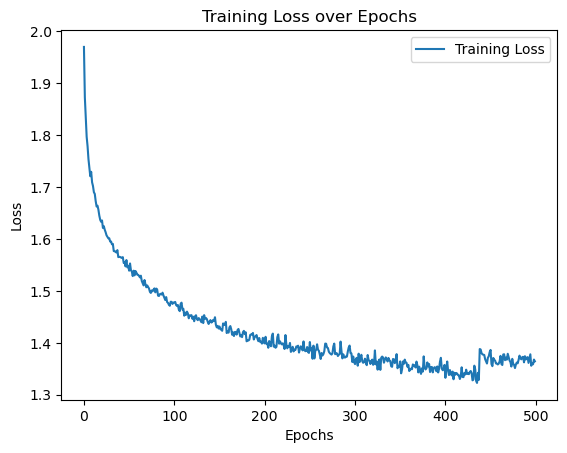

In [64]:
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

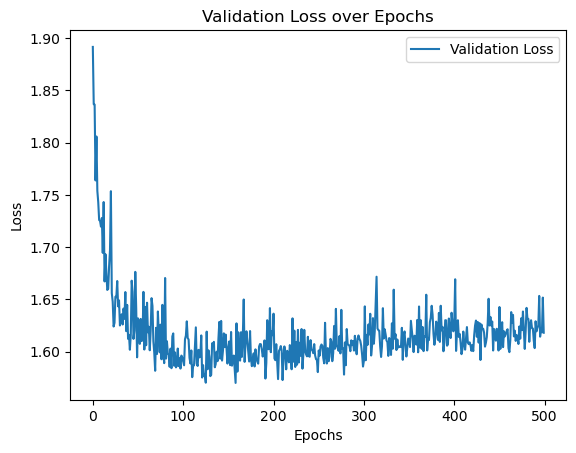

In [65]:
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()

In [66]:
model.eval()
train_predictions = []
train_targets = []

with torch.no_grad():
    for data in train_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        train_predictions.extend(predicted.cpu().numpy())
        train_targets.extend(labels.cpu().numpy())


train_accuracy = accuracy_score(train_targets, train_predictions)
train_precision = precision_score(train_targets, train_predictions, average='weighted')
train_recall = recall_score(train_targets, train_predictions, average='weighted')
train_f1 = f1_score(train_targets, train_predictions, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")

Training Accuracy: 0.52108
Training Precision: 0.5143329810177419
Training Recall: 0.52108
Training F1 Score: 0.51529882751582


In [67]:
# After training, evaluate on the test set
model.eval()

test_predictions = []
test_targets = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_targets.extend(labels.cpu().numpy())


test_accuracy = accuracy_score(test_targets, test_predictions)
test_precision = precision_score(test_targets, test_predictions, average='weighted')
test_recall = recall_score(test_targets, test_predictions, average='weighted')
test_f1 = f1_score(test_targets, test_predictions, average='weighted')

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Accuracy: 0.4426
Test Precision: 0.43781193653223466
Test Recall: 0.4426
Test F1 Score: 0.43798279383592226
